# タイタニックデータの分析例

In [49]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [50]:
df = pd.read_csv('titanic.csv', encoding="utf-8")
df.head()
#Pclass:客室等級
#SibSp:兄弟・配偶者数
#Parch:親・子数
#Cabin:最終所在場所
#Embarked:乗船港

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
df.info()
# Age, Cabin, Embarkedに欠損値がある

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [52]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [53]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [54]:
#欠損値の処理
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode().iloc[0])

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [56]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


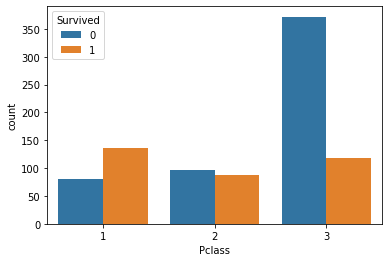

In [57]:
#客室等級と生存
sns.countplot(x="Pclass", hue="Survived", data=df);
# 3等室の犠牲者が多い

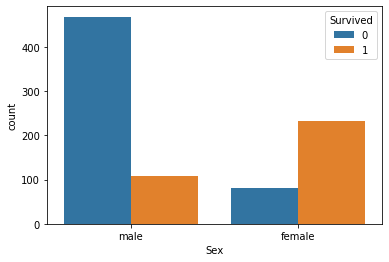

In [58]:
#性別と生存
sns.countplot(x="Sex", hue="Survived", data=df);
# 男性の犠牲者が多い

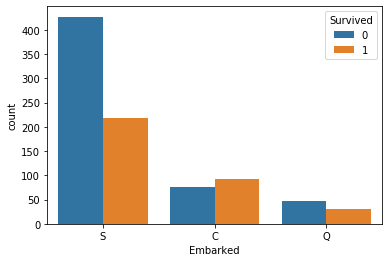

In [59]:
#乗船港と生存
sns.countplot(x="Embarked", hue="Survived", data=df);
# 乗船港Sの犠牲者が多い

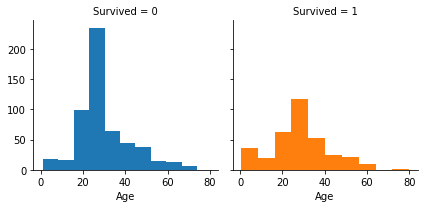

In [60]:
#年齢と生存
grid = sns.FacetGrid(df, col="Survived", hue="Survived")
grid.map(plt.hist, 'Age');
# 若者の犠牲者が多い

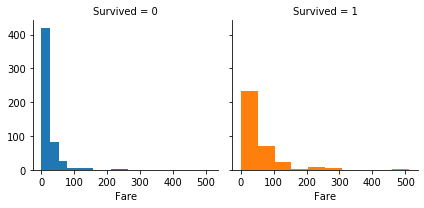

In [61]:
#運賃と生存
grid = sns.FacetGrid(df, col="Survived", hue="Survived")
grid.map(plt.hist, 'Fare');
# 安い運賃の犠牲者が多い

In [62]:
#カテゴリカルデータを数値に変換
df['Sex'] = df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
df['Embarked'] = df['Embarked'].map( {'S': 2, 'C': 1, 'Q':0} ).astype(int)

In [63]:
#特徴量とラベル
df[['Pclass','Sex','Age','Fare','Embarked','Survived']].head()

,Pclass,Sex,Age,Fare,Embarked,Survived
0,3,0,22.0,7.2500,2,0
1,1,1,38.0,71.2833,1,1
2,3,1,26.0,7.9250,2,1
3,1,1,35.0,53.1000,2,1
4,3,0,35.0,8.0500,2,0


In [64]:
#訓練データとテストデータ
X=df[['Pclass','Sex','Age','Fare','Embarked']].values
y=df['Survived'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

#標準化
transformer = StandardScaler() 
X_train = transformer.fit_transform(X_train) 
X_test = transformer.transform(X_test) 

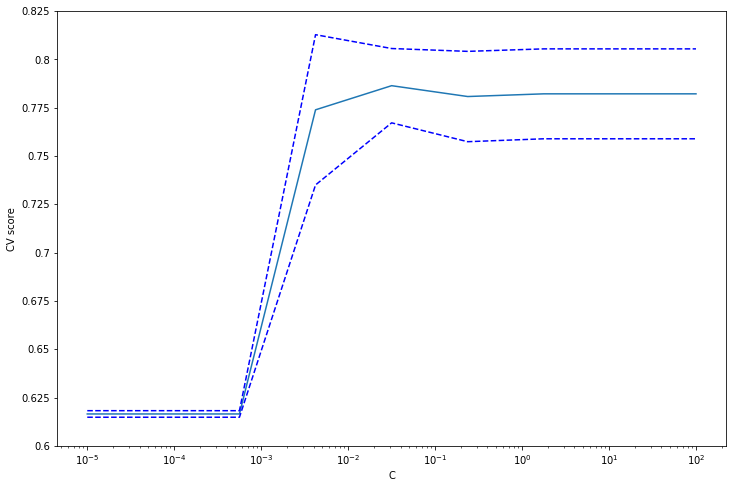

Optimal C: 0.03162277660168379


In [65]:
#ロジスティック回帰の交差検証
clf = LogisticRegression(solver='lbfgs') 

C_s = np.logspace(-5, 2, 9) 
scores = [] 
scores_std = [] 

for C in C_s:
    clf.C = C
    score = cross_val_score(clf, X_train, y_train, scoring="accuracy", cv=5)
    scores.append(np.mean(score))
    scores_std.append(np.std(score))

plt.figure(figsize=(12, 8))
plt.semilogx(C_s, scores) 
plt.semilogx(C_s, np.array(scores) + np.array(scores_std), 'b--') 
plt.semilogx(C_s, np.array(scores) - np.array(scores_std), 'b--')
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel('CV score')
plt.xlabel('C')
plt.show()

opt_C = C_s[np.argmax(scores)]
print("Optimal C: {}".format(opt_C))

In [66]:
#ロジスティック回帰での性能
clf = LogisticRegression(solver='lbfgs', C=opt_C) 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred)) 
print(confusion_matrix(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       110
           1       0.77      0.72      0.75        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179

[[95 15]
 [19 50]]


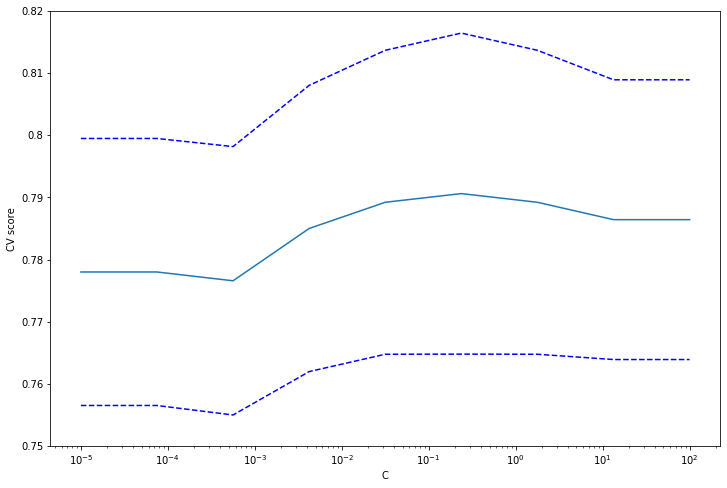

Optimal C: 0.23713737056616552


In [69]:
#線形SVMの交差検証
clf = LinearSVC(max_iter=500000) 

C_s = np.logspace(-5, 2, 9) 
scores = [] 
scores_std = [] 

for C in C_s:
    clf.C = C
    score = cross_val_score(clf, X_train, y_train, scoring="accuracy", cv=5)
    scores.append(np.mean(score))
    scores_std.append(np.std(score))

plt.figure(figsize=(12, 8))
plt.semilogx(C_s, scores) 
plt.semilogx(C_s, np.array(scores) + np.array(scores_std), 'b--') 
plt.semilogx(C_s, np.array(scores) - np.array(scores_std), 'b--')
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel('CV score')
plt.xlabel('C')
plt.show()

opt_C = C_s[np.argmax(scores)]
print("Optimal C: {}".format(opt_C))

In [71]:
#線形SVMでの性能
clf = LinearSVC(max_iter=500000, C=opt_C) 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred)) 
print(confusion_matrix(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       110
           1       0.75      0.72      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

[[93 17]
 [19 50]]


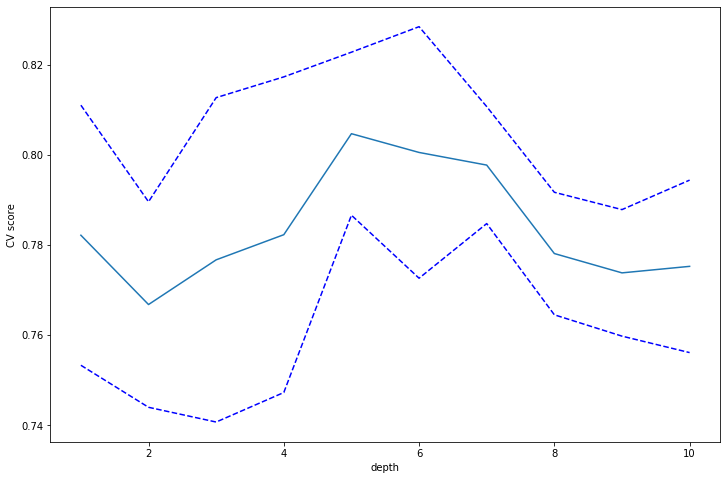

Optimal depth: 5


In [72]:
#決定木の交差検証
depth_s = np.arange(1, 11) 
scores = [] 
scores_std = [] 

for depth in depth_s:
    clf = DecisionTreeClassifier(max_depth = depth)
    score = cross_val_score(clf, X_train, y_train, scoring="accuracy", cv=5) 
    scores.append(np.mean(score))
    scores_std.append(np.std(score))
    
plt.figure(figsize=(12, 8))
plt.plot(depth_s, scores)
plt.plot(depth_s, np.array(scores) + np.array(scores_std), 'b--')
plt.plot(depth_s, np.array(scores) - np.array(scores_std), 'b--')
plt.xlabel("depth")
plt.ylabel("CV score")
plt.show()

opt_depth = depth_s[np.argmax(scores)] 
print("Optimal depth: {}".format(opt_depth))

In [73]:
#決定木での性能
clf = DecisionTreeClassifier(max_depth=opt_depth)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred)) 
print(confusion_matrix(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       110
           1       0.77      0.68      0.72        69

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179

[[96 14]
 [22 47]]


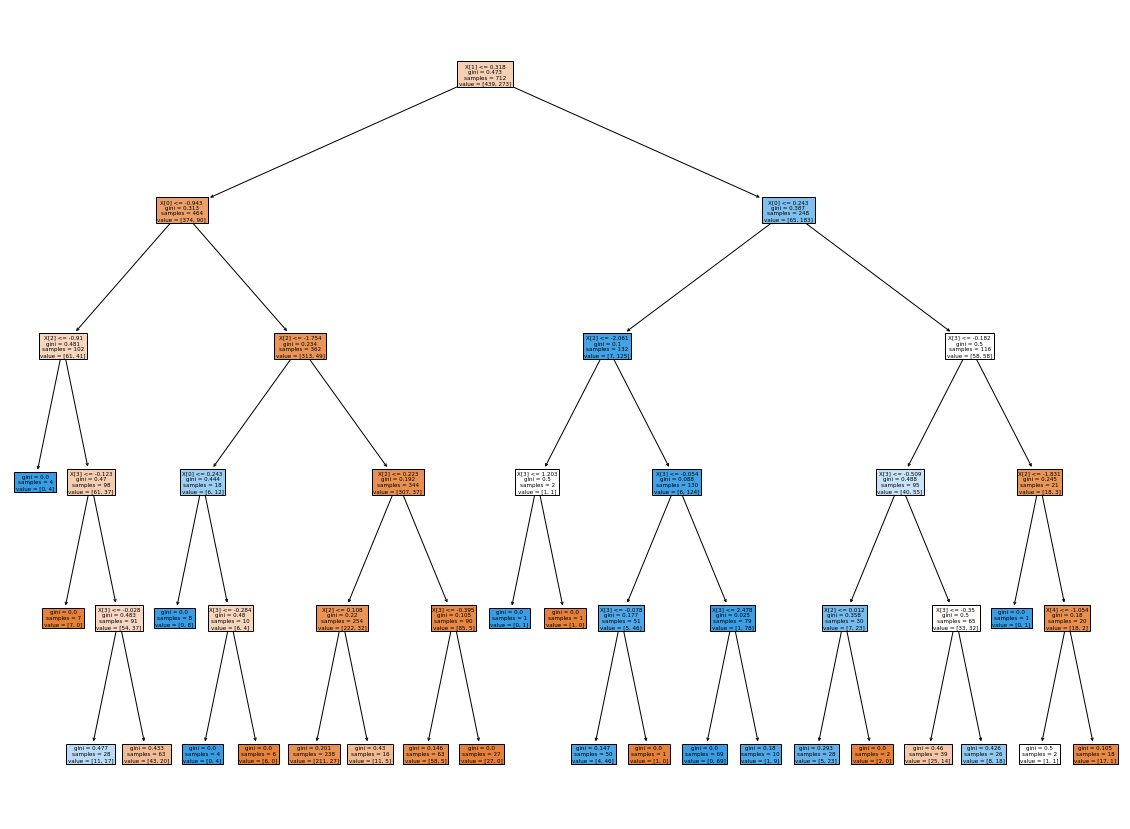

In [74]:
plt.figure(figsize=(20, 15))
plot_tree(clf.fit(X_train, y_train), filled=True) 
plt.show()